### Paso 1

In [4]:
# Instalación e importación de librerías necesarias:

from gc import collect  # Recolección de basura para liberar memoria
from warnings import filterwarnings  # Manejo de mensajes de advertencia

import re  # Expresiones regulares

import numpy as np  # Álgebra lineal
import pandas as pd  # Procesamiento de datos y lectura de archivos CSV
from scipy import stats  # Funciones estadísticas

from itertools import cycle, combinations  # Generación de ciclos y combinaciones

import matplotlib.pyplot as plt  # Visualización de datos
from matplotlib.ticker import FuncFormatter, FormatStrFormatter  # Formateo de ejes en gráficos
from mpl_toolkits.mplot3d import Axes3D  # Gráficos en 3D
from matplotlib.colors import ListedColormap  # Colores personalizados para gráficos
import seaborn as sns  # Visualización estadística
from wordcloud import WordCloud  # Nube de palabras para datos textuales

from io import StringIO  # Manejo de cadenas como archivos

filterwarnings('ignore')  # Ignorar advertencias
from IPython.display import display, HTML, display_html, clear_output  # Mostrar contenido HTML en notebooks

clear_output()  # Limpia la salida actual
print()
collect()  # Ejecuta recolección de basura

class color:
    GREEN = '\033[92m'  # Verde
    RED = '\033[91m'    # Rojo
    BLUE = '\033[94m'   # Azul
    BOLD = '\033[1m'    # Negrita
    END = '\033[0m'     # Fin de formato (restaurar color)


In [5]:
# Configuración del estilo de los gráficos

plt.style.use("fivethirtyeight")  # Establece el estilo de los gráficos al estilo 'fivethirtyeight'
sns.set(rc={"figure.figsize": (10, 10)})  # Define el tamaño predeterminado de las figuras con Seaborn

print(f"{color.GREEN}¡Librerías configuradas con éxito!{color.END}")  # Mensaje de confirmación con color


¡Librerías configuradas con éxito!


### Paso 2

In [6]:
# Manejo de errores al cargar el conjunto de datos con pandas read_csv

try:
    # Intentar leer el archivo CSV
    df = pd.read_csv(r'C:\Users\ti_la\Downloads\salaries.csv')
    print(f"{color.GREEN}Conjunto de datos cargado exitosamente.{color.END}")

except FileNotFoundError:
    # Manejo del error si el archivo no se encuentra
    print(f"{color.RED}Error: Archivo no encontrado. Verifica la ruta del archivo.{color.END}")

except Exception as e:
    # Manejo de cualquier otro tipo de error
    print(f"{color.RED}Ocurrió un error al cargar el conjunto de datos: {e}{color.END}")

print(color.BLUE)  # Imprime texto en color azul (dependiendo de la definición previa de color)
collect()  # Ejecuta recolección de basura para liberar memoria


Conjunto de datos cargado exitosamente.



0

### Paso 3

In [99]:
from IPython.display import display, HTML

def display_dataframe_with_custom_header(df, show_head=False):
    styles = [
        dict(selector="th", props=[("background-color", "#4CAF50"), ("color", "white"), ("font-size", "14px")]),
        dict(selector="td", props=[("font-size", "13px")])
    ]
    
    if show_head:
        display(HTML("<h3>Primeras filas del DataFrame</h3>"))
        styled_df = df.head().style.set_table_styles(styles).set_caption("Vista del DataFrame (Head)")
        display(styled_df)
    else:
        display(HTML("<h3>Información del DataFrame</h3>"))
        display(df.info())


In [100]:
# Mostrar el DataFrame con encabezados personalizados

display_dataframe_with_custom_header(df)  # Muestra información general del DataFrame
display_dataframe_with_custom_header(df, show_head=True)  # Muestra la cabecera (primeras filas) del DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73153 non-null  int64  
 1   experience_level    73143 non-null  object 
 2   employment_type     73151 non-null  object 
 3   job_title           73148 non-null  object 
 4   salary              73147 non-null  float64
 5   salary_currency     73151 non-null  object 
 6   salary_in_usd       73151 non-null  float64
 7   employee_residence  73151 non-null  object 
 8   remote_ratio        73153 non-null  int64  
 9   company_location    73149 non-null  object 
 10  company_size        73152 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.1+ MB


None

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000.000000,USD,170000.000000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000.000000,USD,110000.000000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000.000000,USD,170000.000000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000.000000,USD,110000.000000,US,0,US,M
4,2025,SE,FT,Engineer,143000.000000,USD,143000.000000,US,0,US,M


### Paso 4

In [106]:
import pandas as pd

def plot_missing_values_heatmap(df):
    valores_nulos = df.isnull().sum()
    porcentaje_nulos = (df.isnull().mean() * 100).round(2)
    
    tabla_nulos = pd.DataFrame({
        'Valores Nulos': valores_nulos,
        'Porcentaje (%)': porcentaje_nulos
    })

    # Mostrar solo columnas con al menos un valor nulo
    tabla_nulos = tabla_nulos[tabla_nulos['Valores Nulos'] > 0]
    
    return tabla_nulos


In [107]:
# Visualizar los valores faltantes en el DataFrame mediante un mapa de calor

plot_missing_values_heatmap(df)  # Genera un mapa de calor para identificar valores nulos en el DataFrame


,Valores Nulos,Porcentaje (%)
experience_level,10,0.01
employment_type,2,0.00
job_title,5,0.01
salary,6,0.01
salary_currency,2,0.00
salary_in_usd,2,0.00
employee_residence,2,0.00
company_location,4,0.01
company_size,1,0.00


### Paso 5

In [108]:
# Verificación y eliminación de valores duplicados en el conjunto de datos

duplicate_values = df.duplicated().sum()  # Cuenta el número de filas duplicadas en el DataFrame
print(color.BLUE + f'El conjunto de datos contiene {color.BOLD + color.RED}{duplicate_values}{color.END} {color.BLUE}valores duplicados')

# Eliminación de filas duplicadas
df_no_duplicates = df.drop_duplicates()  # Crea un nuevo DataFrame sin filas duplicadas


El conjunto de datos contiene 39117 valores duplicados


In [18]:
import pandas as pd

def apply_duplicated_styling(df):
    resultados = []

    for col in df.columns:
        tiene_duplicados = df[col].duplicated().any()
        resultados.append({
            'Columna': col,
            'Tiene Duplicados': tiene_duplicados
        })

    tabla_resultado = pd.DataFrame(resultados)
    display(tabla_resultado)


In [19]:
# Verifica columnas duplicadas en el DataFrame y aplica estilo para destacarlas

styled_df = apply_duplicated_styling(df)  # Aplica formato visual para resaltar columnas duplicadas
styled_df  # Muestra el DataFrame con el estilo aplicado


,Columna,Tiene Duplicados
0,work_year,True
1,experience_level,True
2,employment_type,True
3,job_title,True
4,salary,True
5,salary_currency,True
6,salary_in_usd,True
7,employee_residence,True
8,remote_ratio,True
9,company_location,True


### Paso 6

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def calculate_extended_statistics(df, opacity=1.0, font_size='14px'):
    numeric_df = df.select_dtypes(include=[np.number])  # Solo columnas numéricas
    stats = {}

    for col in numeric_df.columns:
        series = numeric_df[col].dropna()
        stats[col] = {
            'Mean': series.mean(),
            'Median': series.median(),
            'Mode': series.mode().iloc[0] if not series.mode().empty else np.nan,
            'Range': series.max() - series.min(),
            'Stdev': series.std(),
            'Variance': series.var(),
            'IQR': series.quantile(0.75) - series.quantile(0.25),
            '25%': series.quantile(0.25),
            '50%': series.median(),
            '75%': series.quantile(0.75),
            'Min': series.min(),
            'Max': series.max(),
            'Skewness': skew(series),
            'Kurtosis': kurtosis(series)
        }

    stats_df = pd.DataFrame(stats).T  # Transponer para que las columnas sean las variables

    # Estilo para visualización en Jupyter
    styled_df = stats_df.style.set_properties(**{
        'opacity': str(opacity),
        'font-size': font_size,
        'text-align': 'center'
    }).format("{:,.2f}")  # Formatear con comas y 2 decimales

    return styled_df


In [29]:
# Cálculo de estadísticas con formato visual personalizado

stats_df = calculate_statistics(df, opacity=0.4, font_size='19px')  # Calcula estadísticas del DataFrame con opacidad y tamaño de fuente personalizados
stats_df  # Muestra el DataFrame con las estadísticas calculadas y estilo aplicado


In [9]:
def variable_summary(df):
    summary = pd.DataFrame()

    summary['Data Type'] = df.dtypes
    summary['Count'] = df.count()
    summary['Unique Values'] = df.nunique()
    summary['Missing'] = df.isnull().sum()


    return summary.reset_index().rename(columns={'index': 'Variable'})


In [10]:
# Generación de un resumen estadístico de las variables del DataFrame

summary_df = variable_summary(df)  # Crea un DataFrame con estadísticas resumidas de cada variable
summary_df  # Muestra el resumen generado


,Variable,Data Type,Count,Unique Values,Missing
0,work_year,float64,73141,6,12
1,experience_level,object,73139,4,14
2,employment_type,object,73147,4,6
3,job_title,object,73144,289,9
4,salary,float64,73143,7094,10
5,salary_currency,object,73147,25,6
6,salary_in_usd,float64,73147,7705,6
7,employee_residence,object,73147,93,6
8,remote_ratio,float64,73149,3,4
9,company_location,object,73145,86,8


### Paso 7

# 📊 Step 7 | Exploratory Data Analysis (EDA)


## 💡 What is EDA?

EDA stands for **Exploratory Data Analysis**. Its the process of analyzing datasets to:
- Summarize their main characteristics
- Discover patterns
- Spot anomalies
- Formulate hypotheses

EDA is typically done before building models or making predictions.



## 📈 Types of EDA

### 🔹 1. Univariate Analysis
Focuses on a single variable to understand:
- Distribution (e.g., histogram, box plot)
- Central tendency (mean, median, mode)
- Spread (range, variance, standard deviation)

### 🔹 2. Bivariate Analysis
Analyzes the relationship between two variables:
- Scatter plots
- Correlation analysis
- Cross-tabulations (for categorical data)

### 🔹 3. Multivariate Analysis
Looks at relationships between **three or more variables**:
- Principal Component Analysis (PCA)
- Cluster analysis
- Heatmaps



## 📊 Understanding Data Distributions

### 📌 What is a Distribution?
A distribution describes how values are spread across a variable.

### Common Distributions:

- **Normal (Gaussian)**: Bell-shaped curve. Mean = Median = Mode.
- **Uniform**: All outcomes equally likely.
- **Binomial**: Discrete, number of successes in fixed trials.
- **Poisson**: Number of events in a fixed interval.
- **Exponential**: Time between Poisson events.
- **Gamma**: Time until nth event in Poisson process.
- **Chi-Square**: Sum of squared normal variables (used in hypothesis testing).
- **Students t-Distribution**: Like normal, but with heavier tails (small sample sizes).



## 🔀 Skewness in Distributions

### 📉 Left Skew (Negative Skew)
- Long tail on the **left**.
- Mean < Median.
- Data concentrated on the right.

### 📈 Right Skew (Positive Skew)
- Long tail on the **right**.
- Mean > Median.
- Data concentrated on the left.


 With EDA, you gain insights that guide preprocessing, feature engineering, and model selection.


### Paso 8

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist_histogram(df, columns, columns_per_row=2):
    num_plots = len(columns)
    rows = (num_plots + columns_per_row - 1) // columns_per_row
    plt.figure(figsize=(columns_per_row * 5, rows * 4))

    for i, col in enumerate(columns, 1):
        plt.subplot(rows, columns_per_row, i)
        sns.histplot(df[col].dropna(), kde=False, bins=30)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


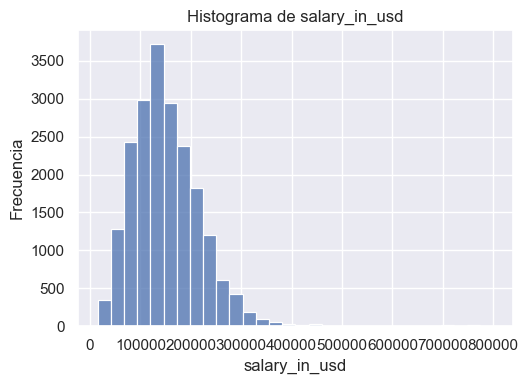

In [32]:
# Graficar histogramas para columnas específicas del DataFrame
columns = ['salary_in_usd']  # Lista de columnas a graficar
plot_hist_histogram(df, columns, columns_per_row=2)  # Genera histogramas para las columnas indicadas, mostrando 2 por fila


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kde_histogram(df, columns, columns_per_row=2):
    num_plots = len(columns)
    rows = (num_plots + columns_per_row - 1) // columns_per_row
    plt.figure(figsize=(columns_per_row * 5, rows * 4))

    for i, col in enumerate(columns, 1):
        plt.subplot(rows, columns_per_row, i)
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Histograma con KDE de {col}')
        plt.xlabel(col)
        plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# columns = ['salary_in_usd']
# plot_kde_histogram(df, columns, columns_per_row=2)


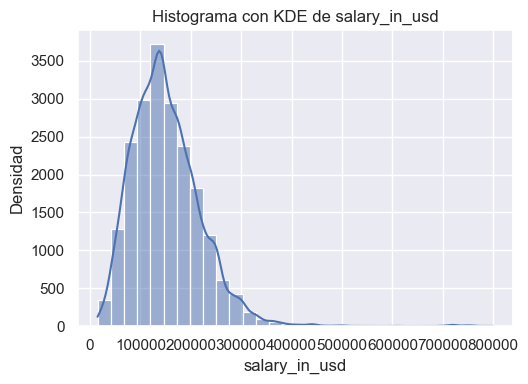

In [35]:
# Graficar histogramas y estimaciones de densidad kernel (KDE) para columnas específicas del DataFrame

columns = ['salary_in_usd']  # Lista de columnas a graficar
plot_kde_histogram(df, columns, columns_per_row=2)  # Genera histogramas con curvas KDE para las columnas indicadas, mostrando 2 por fila


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_brand_distribution(df, columns):
    num_cols = len(columns)
    cols_per_row = 2
    rows = (num_cols + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(cols_per_row * 6, rows * 4))
    for i, col in enumerate(columns, 1):
        plt.subplot(rows, cols_per_row, i)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.show()

# Ejemplo de uso:
# columns = ['work_year', 'experience_level', 'employment_type', 'company_size', 'remote_ratio']
# plot_brand_distribution(df, columns)


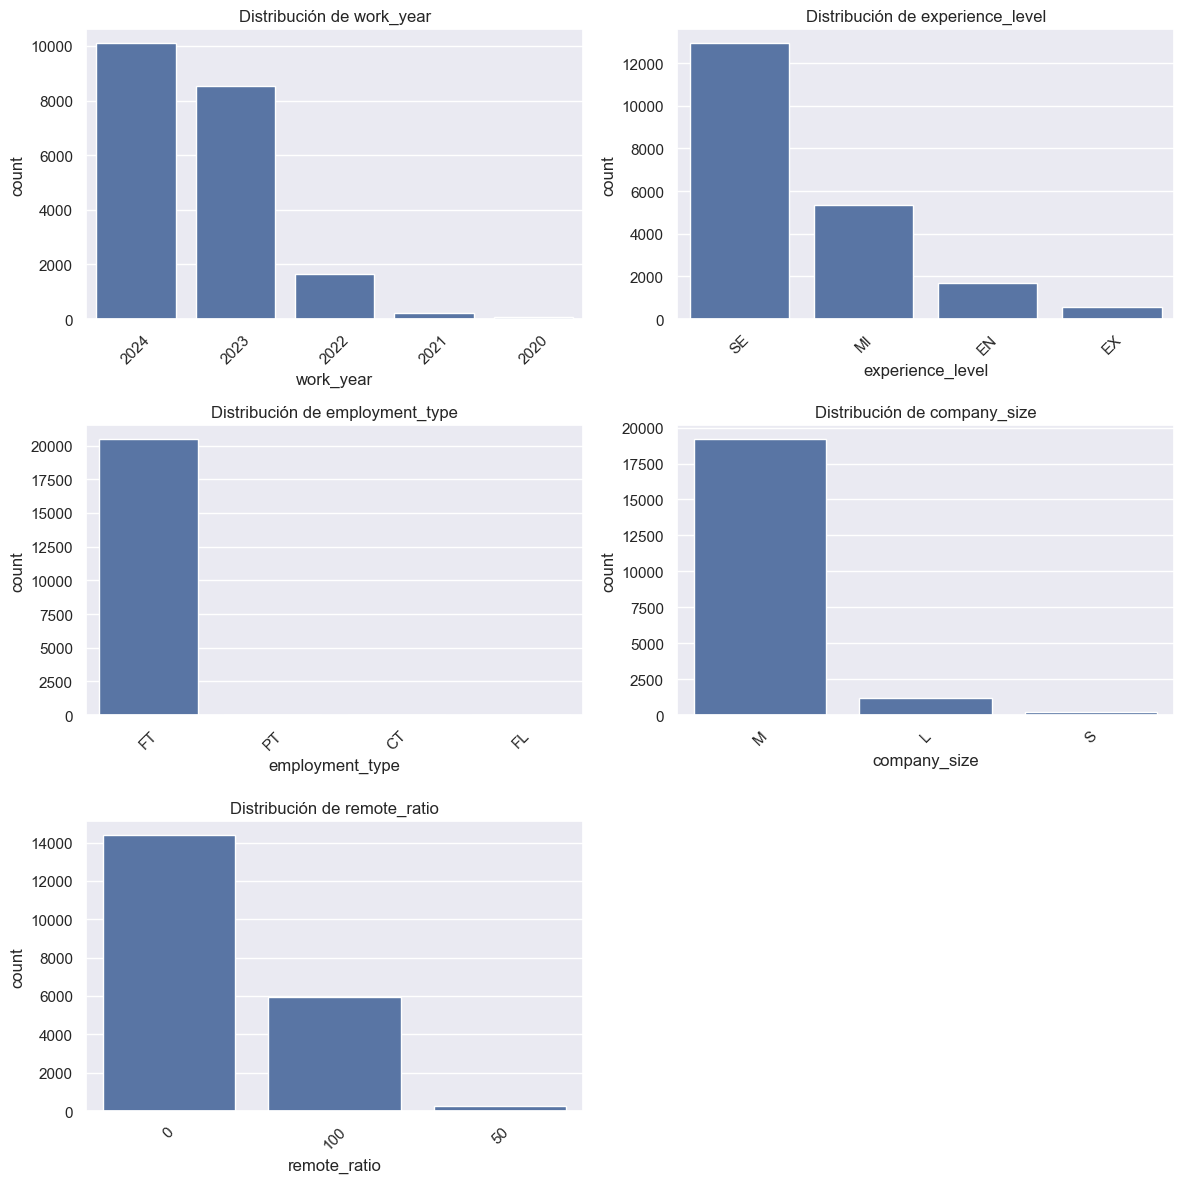

In [38]:
# Visualizar la distribución de diferentes categorías en columnas seleccionadas

columns = ['work_year', 'experience_level', 'employment_type', 'company_size', 'remote_ratio']  # Columnas categóricas a analizar
plot_brand_distribution(df, columns)  # Genera gráficos que muestran la distribución de cada categoría en las columnas indicadas


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_count(df, column_name, title='', top_n=None):
    if top_n:
        data = df[column_name].value_counts().nlargest(top_n)
    else:
        data = df[column_name].value_counts()
    plt.figure(figsize=(10,6))
    sns.barplot(x=data.index, y=data.values)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()


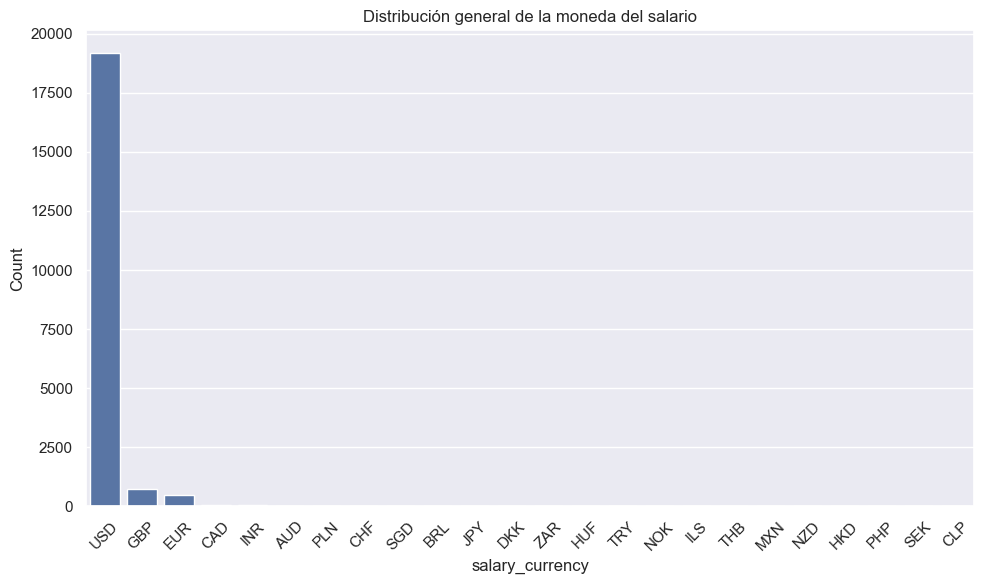

In [41]:
# Ejemplo de uso para graficar el conteo de categorías en una columna específica

title = 'Distribución general de la moneda del salario'  # Título del gráfico
plot_category_count(df, column_name='salary_currency', title=title)  # Genera un gráfico de barras con el conteo de cada categoría en 'salary_currency'


In [42]:
def plot_category_count(df, column_name, title='', top_n=None):
    if top_n:
        data = df[column_name].value_counts().nlargest(top_n)
    else:
        data = df[column_name].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.index, y=data.values, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()


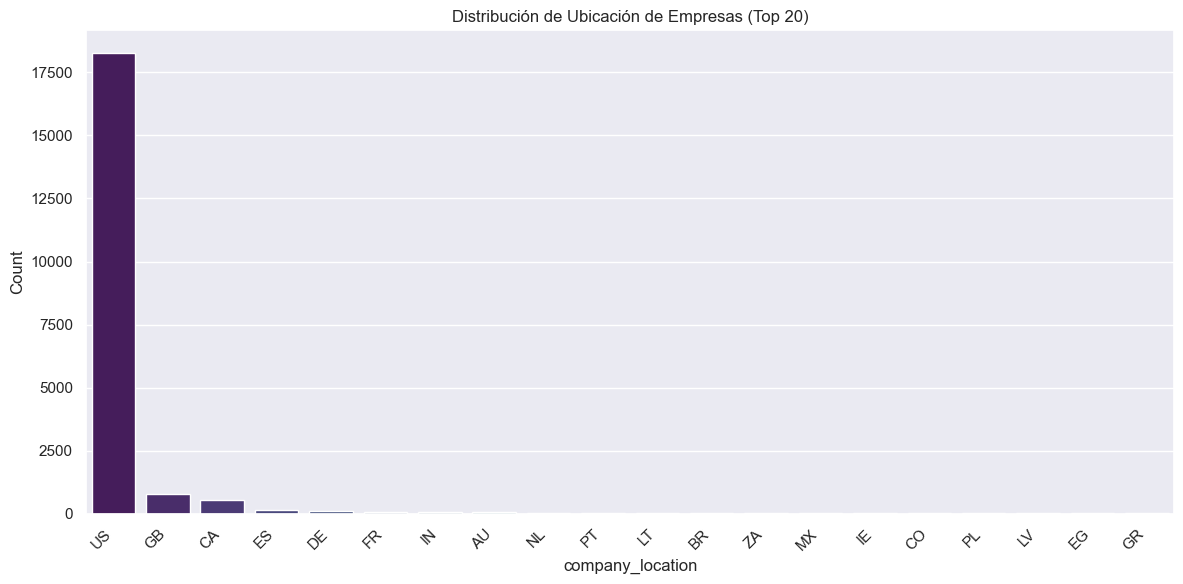

In [43]:
# Graficar la distribución de las 20 ubicaciones de empresa más frecuentes

title = 'Distribución de Ubicación de Empresas (Top 20)'  # Título del gráfico
plot_category_count(df, column_name='company_location', title=title, top_n=20)  # Muestra un gráfico de barras con las 20 ubicaciones de empresa más comunes


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_count(df, column_name, title='', top_n=None):
    if top_n:
        data = df[column_name].value_counts().nlargest(top_n)
    else:
        data = df[column_name].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data.index, y=data.values, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.tight_layout()
    plt.show()


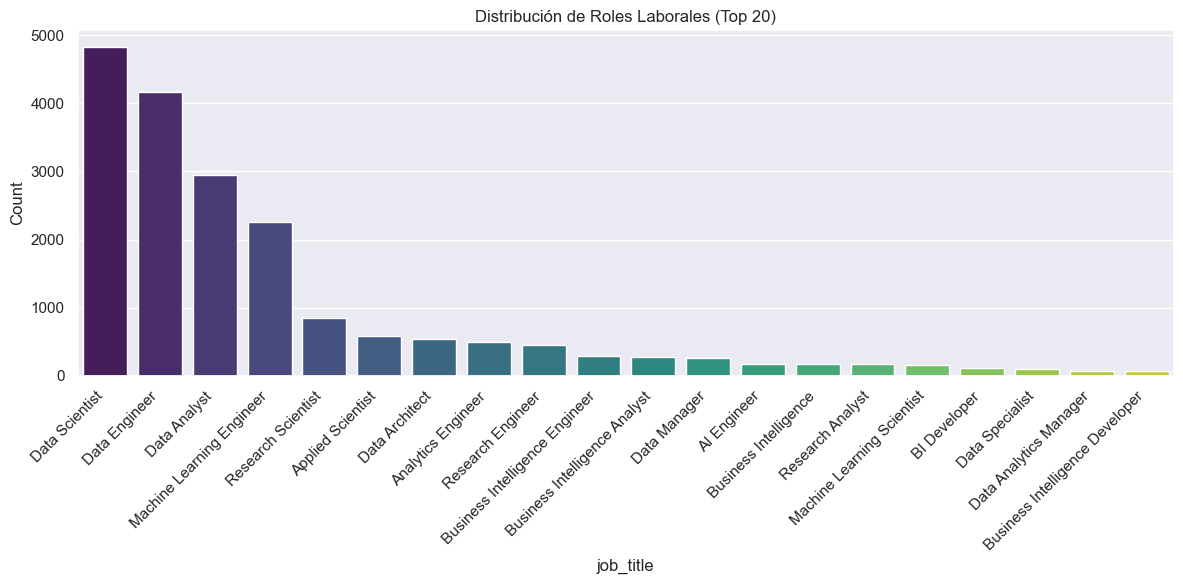

In [45]:
# Graficar la distribución de los 20 roles laborales más comunes

title = 'Distribución de Roles Laborales (Top 20)'  # Título del gráfico
plot_category_count(df, column_name='job_title', title=title, top_n=20)  # Muestra un gráfico de barras con los 20 roles de trabajo más frecuentes


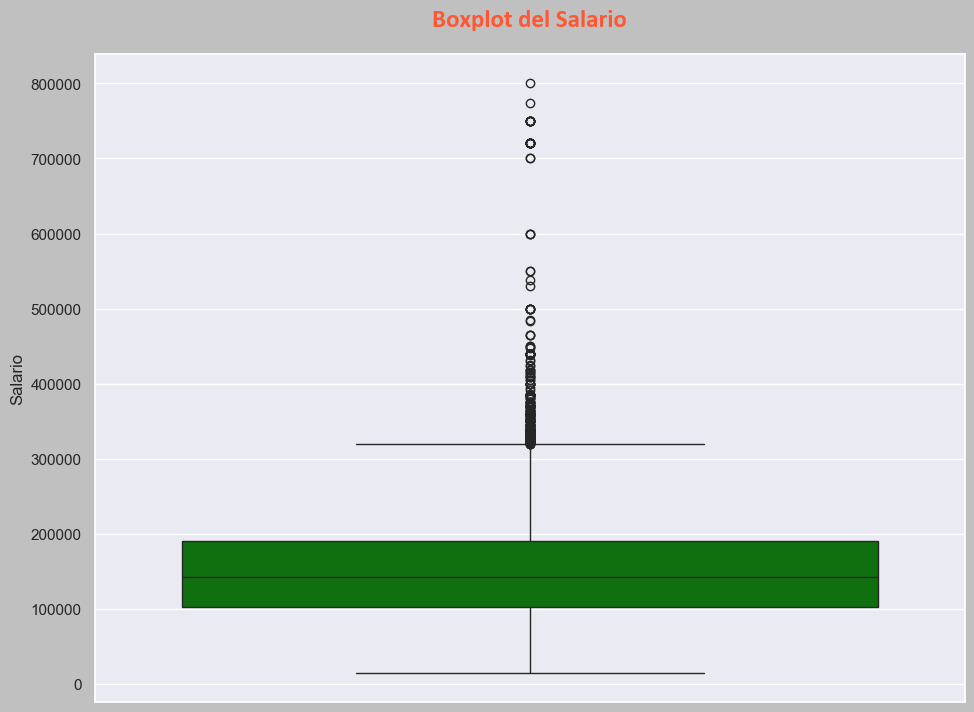

In [46]:
# Gráfico de caja (boxplot) para detectar valores atípicos en el salario

plt.figure(figsize=(10, 8), facecolor='silver')  # Configura el tamaño y color de fondo de la figura
ax = sns.boxplot(data=df, y='salary_in_usd', color='green')  # Dibuja el boxplot del salario en verde
plt.ylabel('Salario')  # Etiqueta del eje Y
plt.title('Boxplot del Salario', pad=20, fontsize=18, color='#FF5733', fontname='Calibri', fontweight='bold')  # Título del gráfico con formato personalizado
plt.show()  # Muestra el gráfico


In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Word_Cloud(data, color_background='white', colormap='viridis'):
    text = ' '.join(data.dropna().astype(str))
    wc = WordCloud(background_color=color_background, colormap=colormap, width=800, height=400).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


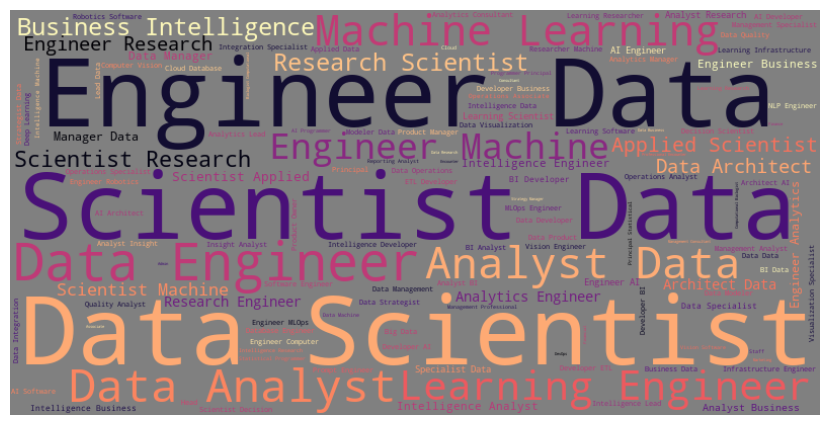

In [49]:
# Ejemplo de uso para generar una nube de palabras a partir de una columna específica

# Suponiendo que tienes una serie de Pandas `df['job_title']`, color de fondo 'gris' y mapa de colores 'magma'
Word_Cloud(data=df['job_title'], color_background='gray', colormap='magma')  # Genera y muestra una nube de palabras para los títulos de trabajo


### Paso 9

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_job_titles(df, top_n=10, title='', rotation=45):
    top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='coolwarm')
    plt.title(title)
    plt.xticks(rotation=rotation, ha='right')
    plt.ylabel('Salario promedio en USD')
    plt.xlabel('Título de trabajo')
    plt.tight_layout()
    plt.show()


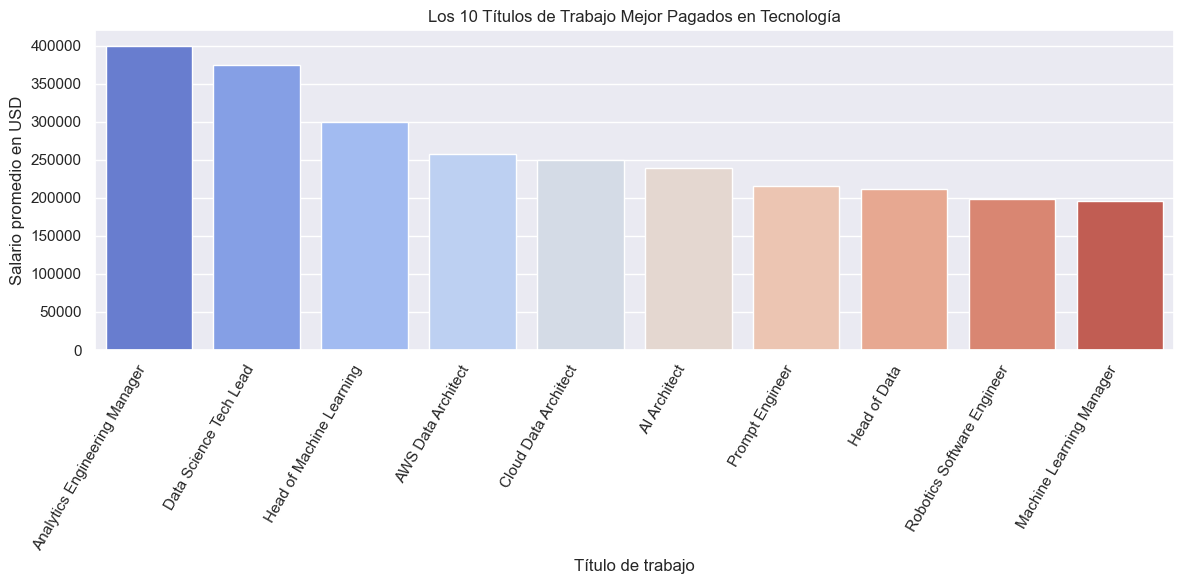

In [51]:
# Graficar los 10 títulos de trabajo mejor pagados en la industria tecnológica

plot_top_job_titles(df, top_n=10, title='Los 10 Títulos de Trabajo Mejor Pagados en Tecnología', rotation=60)
# Muestra un gráfico con los 10 roles mejor pagados, con etiquetas rotadas 60 grados para mejor lectura


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplot(df, x, y, hue=None, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()


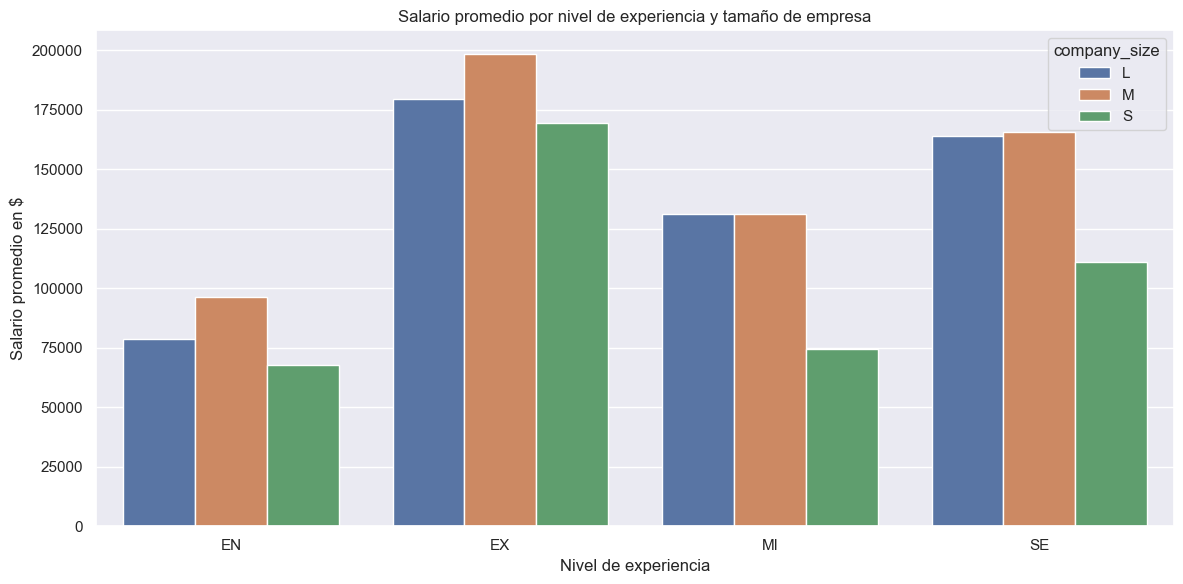

In [54]:
# Agrupar datos por nivel de experiencia y tamaño de empresa, y calcular el salario promedio

salary_by_exp_comp = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()

# Gráfico de barras para mostrar el salario promedio según nivel de experiencia y tamaño de empresa

plot_barplot(
    df=salary_by_exp_comp.reset_index(),  # Reinicia el índice para facilitar la graficación
    x='experience_level',  # Eje X: nivel de experiencia
    y='salary_in_usd',     # Eje Y: salario promedio en dólares
    hue='company_size',    # Diferenciación por tamaño de empresa (colores)
    xlabel='Nivel de experiencia', 
    ylabel='Salario promedio en $', 
    title='Salario promedio por nivel de experiencia y tamaño de empresa'
)


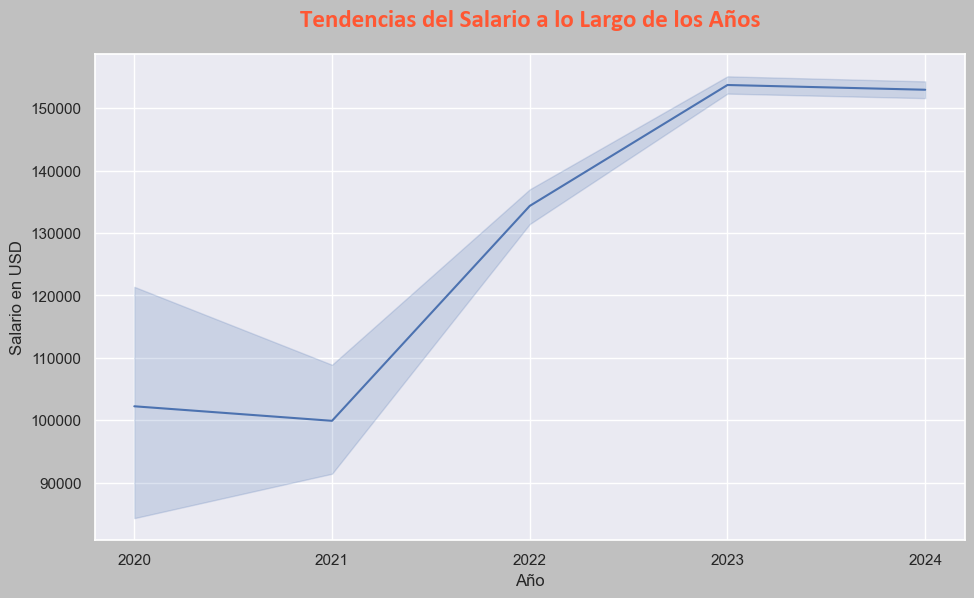

In [55]:
# Configurar tamaño y color de fondo de la figura
plt.figure(figsize=(10, 6), facecolor='silver')

# Crear gráfico de líneas para mostrar la tendencia del salario a lo largo de los años
sns.lineplot(x=df["work_year"], y=df["salary_in_usd"])

# Establecer etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Salario en USD')
plt.title('Tendencias del Salario a lo Largo de los Años', pad=20, fontsize=18, color='#FF5733', fontname='Calibri', fontweight='bold')

# Configurar el eje X para mostrar solo valores enteros
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Mostrar el gráfico
plt.show()


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_salary_vs_remote_ratio(df, x_columns, y):
    n_cols = 2
    n_rows = (len(x_columns) + 1) // n_cols
    plt.figure(figsize=(n_cols * 6, n_rows * 5))
    
    for i, col in enumerate(x_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            sns.boxplot(data=df, x=col, y=y)
            plt.xticks(rotation=45)
        else:
            sns.scatterplot(data=df, x=col, y=y, alpha=0.6)
        plt.title(f'Salario vs {col}')
    
    plt.tight_layout()
    plt.show()


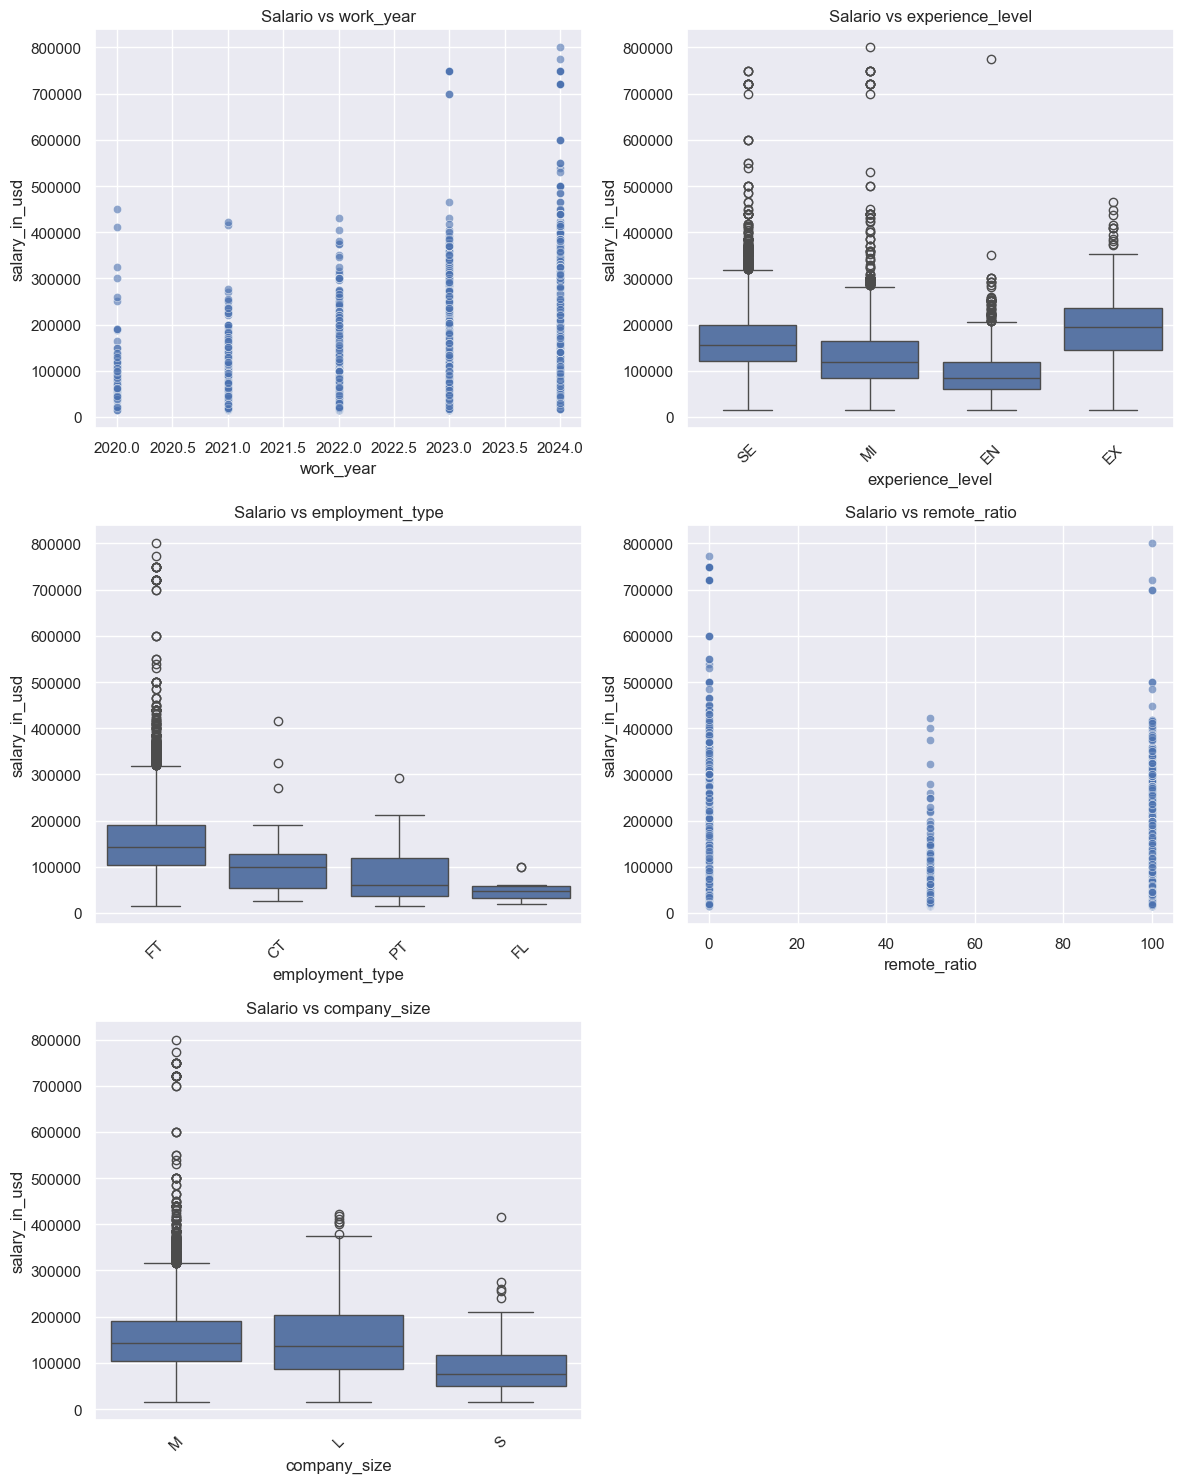

In [58]:
# Graficar la relación entre el salario y varias características del DataFrame

x_columns = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']  # Columnas independientes
plot_salary_vs_remote_ratio(df, x_columns=x_columns, y='salary_in_usd')  # Muestra gráficos para analizar cómo el salario varía según estas variables


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_target_by_category(df, target, columns):
    n_cols = 2
    n_rows = (len(columns) + 1) // n_cols
    plt.figure(figsize=(n_cols * 7, n_rows * 5))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(data=df, x=col, y=target)
        plt.title(f'{target} por {col}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


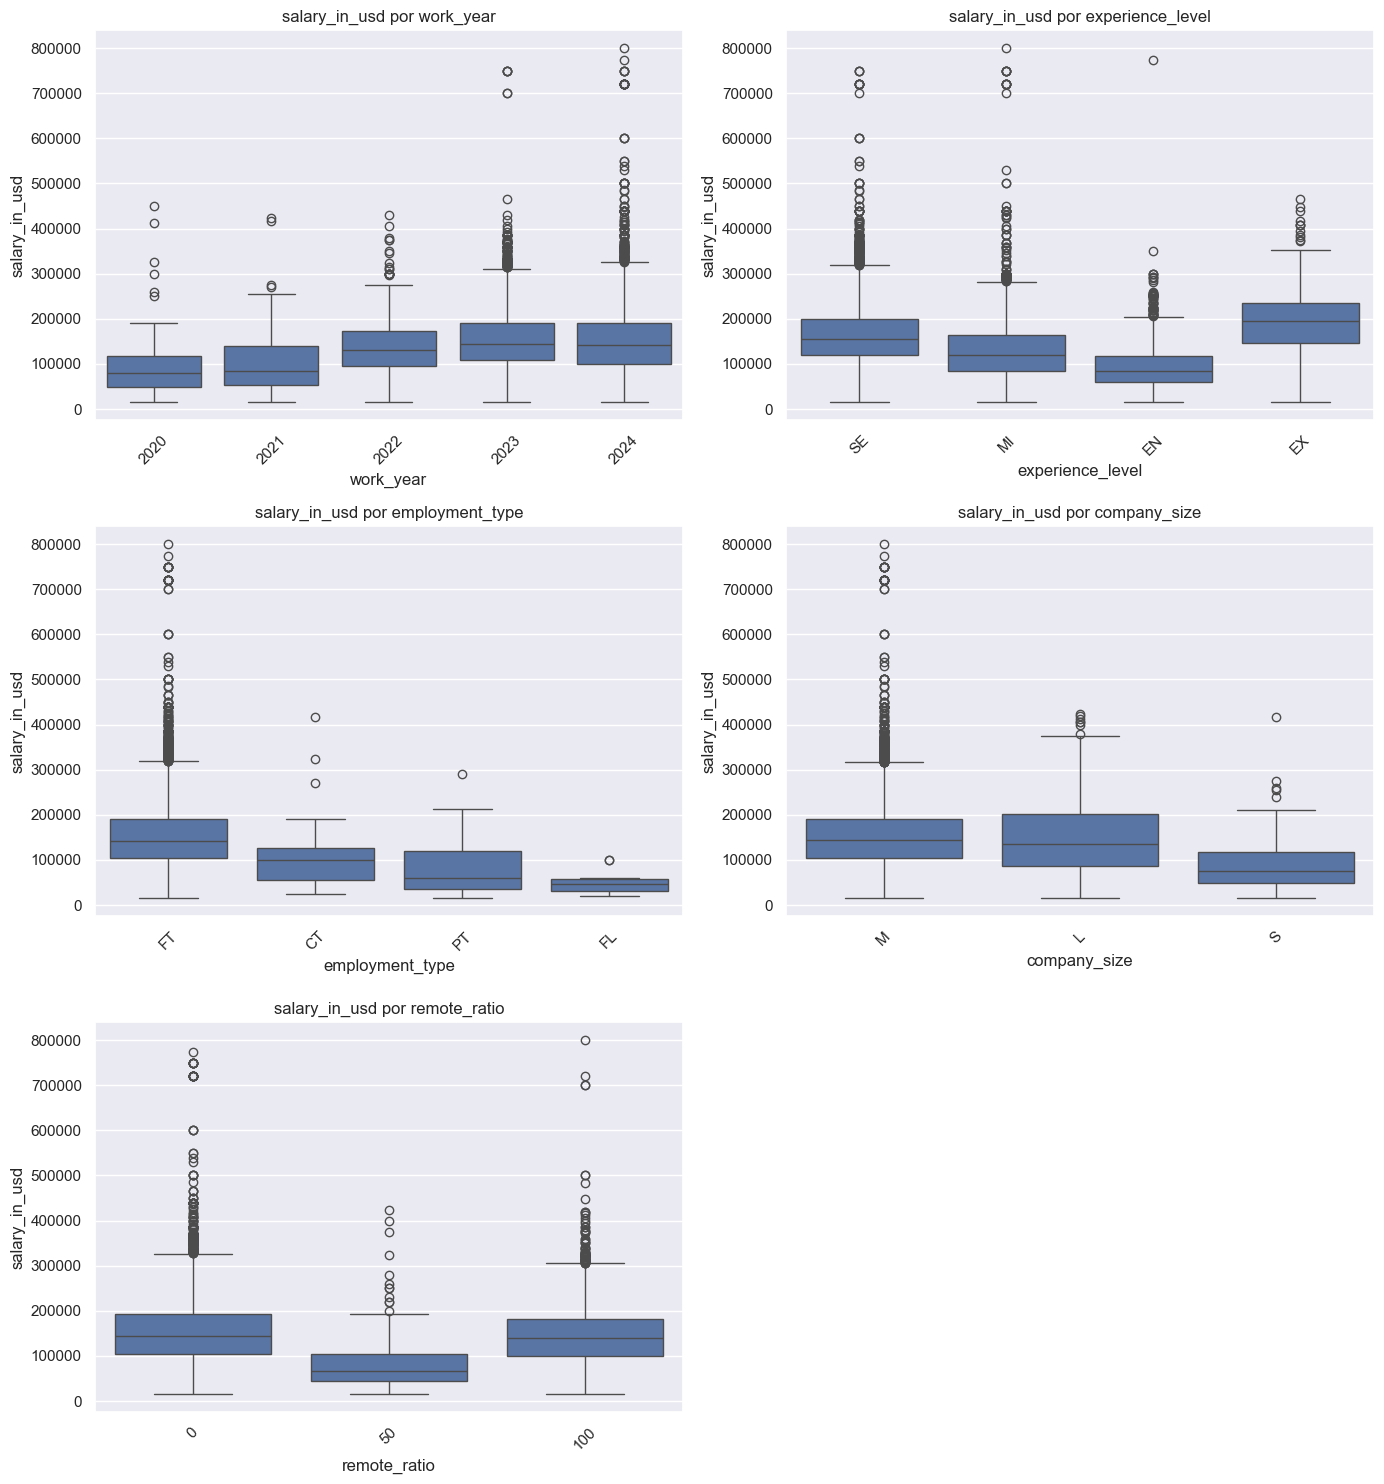

In [60]:
# Ejemplo de uso para mostrar cómo varía la variable objetivo según categorías seleccionadas

# Suponiendo que 'salary_in_usd' es la variable objetivo y el DataFrame se llama 'df'
columns = ['work_year', 'experience_level', 'employment_type', 'company_size', 'remote_ratio']  # Columnas categóricas para analizar
show_target_by_category(df, 'salary_in_usd', columns=columns)  # Muestra gráficos que relacionan el salario con las categorías seleccionadas


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    # Seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Mapa de calor de correlaciones (solo variables numéricas)')
    plt.tight_layout()
    plt.show()


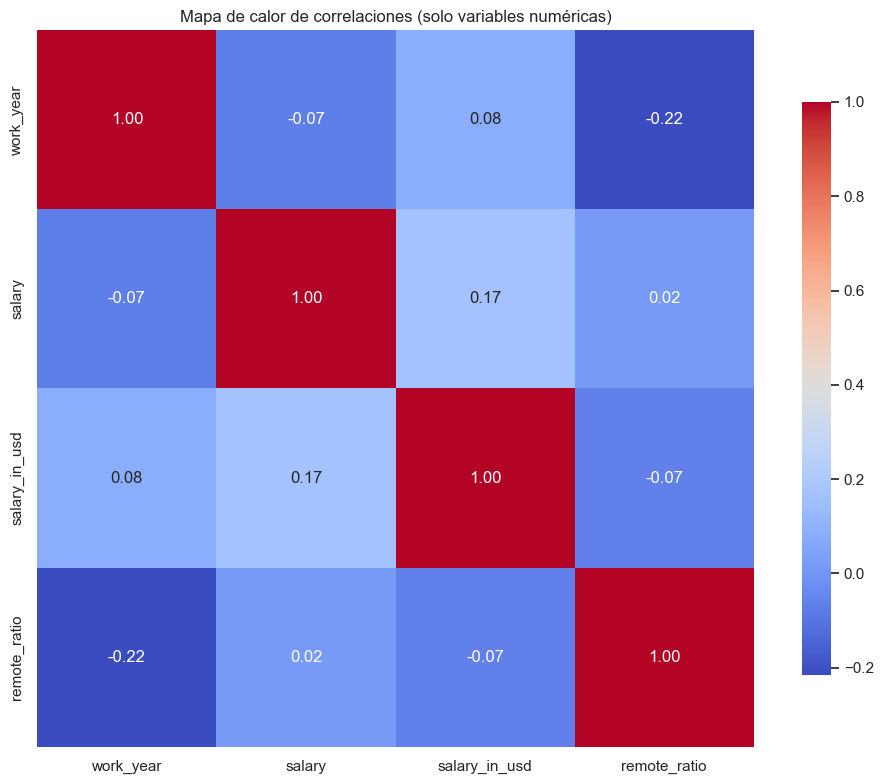

In [64]:
# Llamada a la función para mostrar un mapa de calor de correlaciones entre variables del DataFrame

plot_correlation_heatmap(df)  # Genera y muestra un heatmap con las correlaciones entre las columnas numéricas


### Paso 10

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_by_category(df, x_column, y_column, category_columns, title=''):
    n_cols = 2
    n_rows = (len(category_columns) + 1) // n_cols
    plt.figure(figsize=(n_cols * 7, n_rows * 5))
    
    for i, cat_col in enumerate(category_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.scatterplot(data=df, x=x_column, y=y_column, hue=cat_col, palette='Set2', alpha=0.7)
        plt.title(f'{title}\npor {cat_col}')
        plt.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
    
    plt.show()


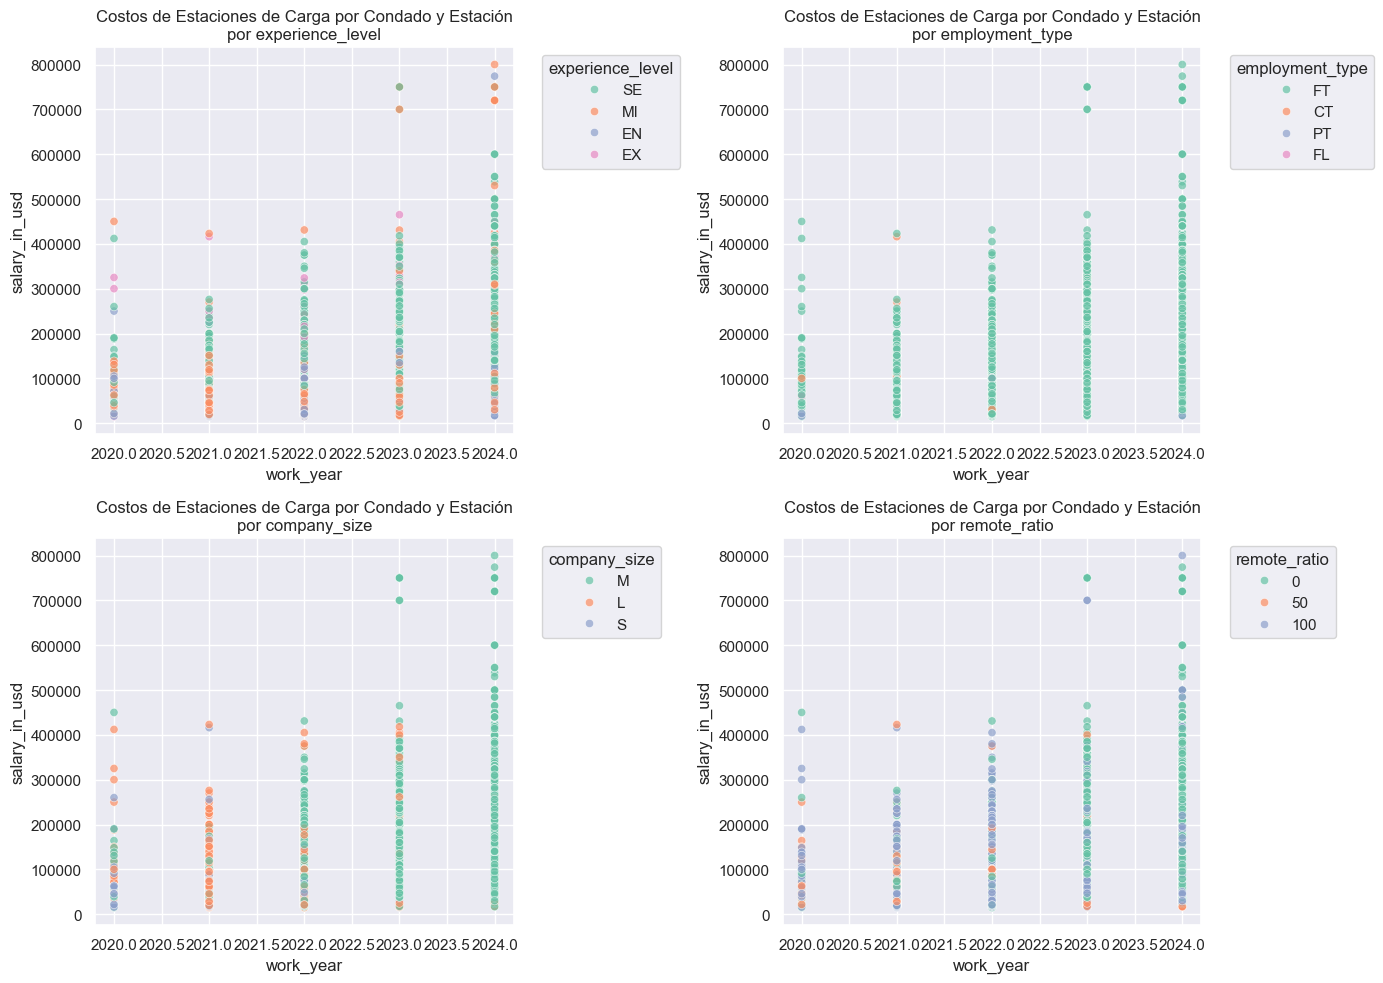

In [67]:
# Ejemplo de uso para graficar dispersión con categorización

plot_scatter_by_category(
    df,
    x_column='work_year',        # Variable en el eje X
    y_column='salary_in_usd',    # Variable en el eje Y
    category_columns=['experience_level', 'employment_type', 'company_size', 'remote_ratio'],  # Categorías para diferenciar puntos
    title='Costos de Estaciones de Carga por Condado y Estación'  # Título del gráfico
)


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_custom_pairplot(df, columns, target):
    sns.pairplot(
        df[columns],
        diag_kind='kde',
        plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
        diag_kws={'shade': True}
    )
    plt.suptitle(f'Pairplot personalizado incluyendo {target}', y=1.02, fontsize=16)
    plt.show()


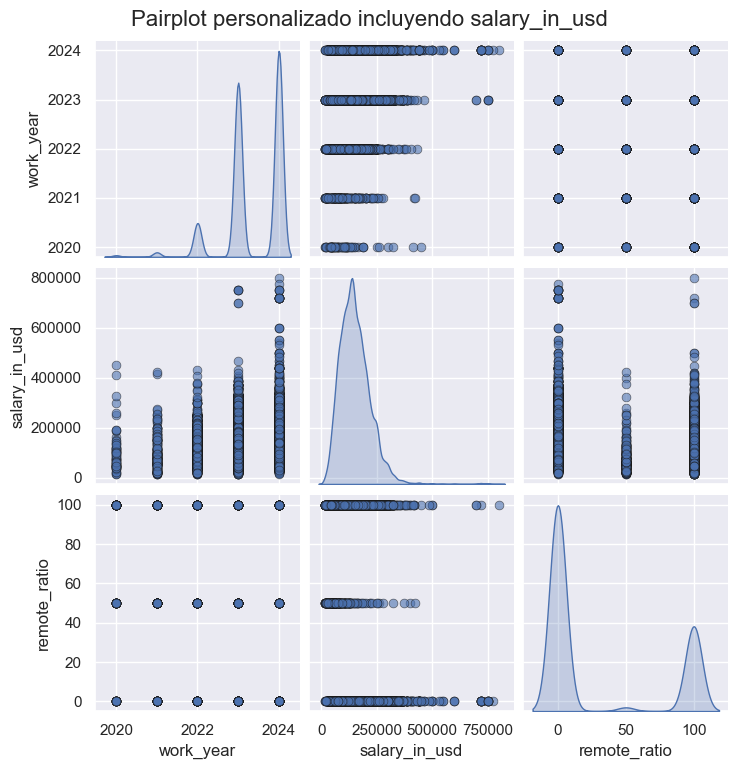

In [69]:
# Llamada a la función para crear un pairplot personalizado

create_custom_pairplot(
    df=df,
    columns=['work_year', 'salary_in_usd', 'remote_ratio'],  # Columnas a incluir en el pairplot
    target='salary_in_usd'  # Variable objetivo para resaltar o analizar en el gráfico
)


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_mean_salary_trends(df, category_col, title, limit=None):
    # Agrupar por la categoría y calcular el salario promedio
    mean_salaries = df.groupby(category_col)['salary_in_usd'].mean().sort_values(ascending=False)
    
    if limit:
        mean_salaries = mean_salaries.head(limit)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_salaries.index, y=mean_salaries.values, palette='viridis')
    plt.title(title)
    plt.xlabel(category_col.replace('_', ' ').capitalize())
    plt.ylabel('Salario promedio (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


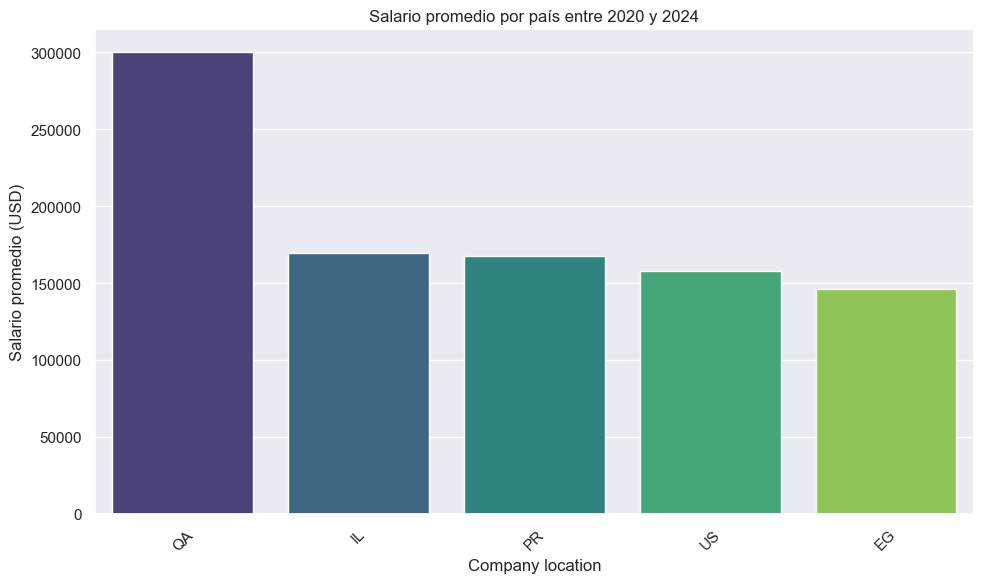

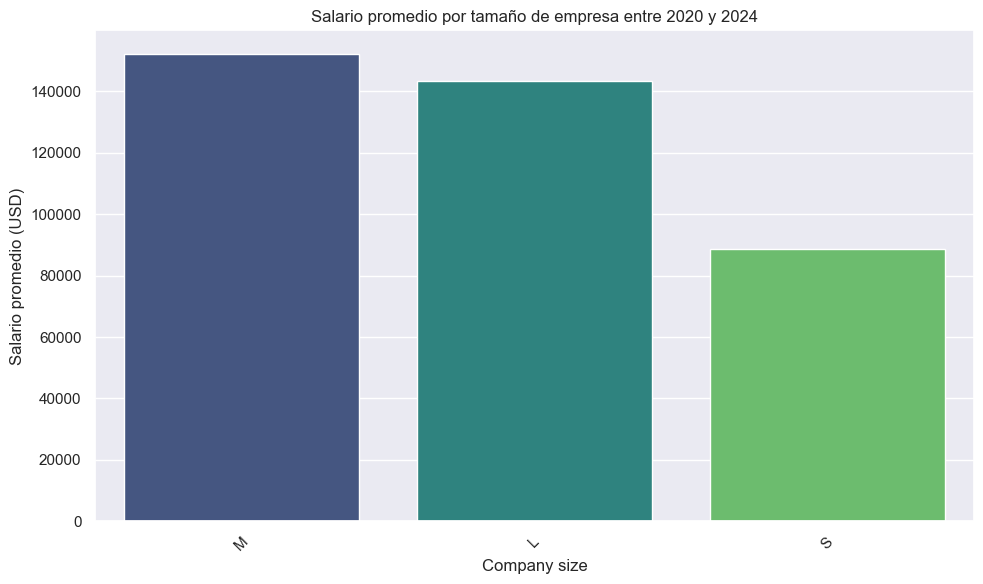

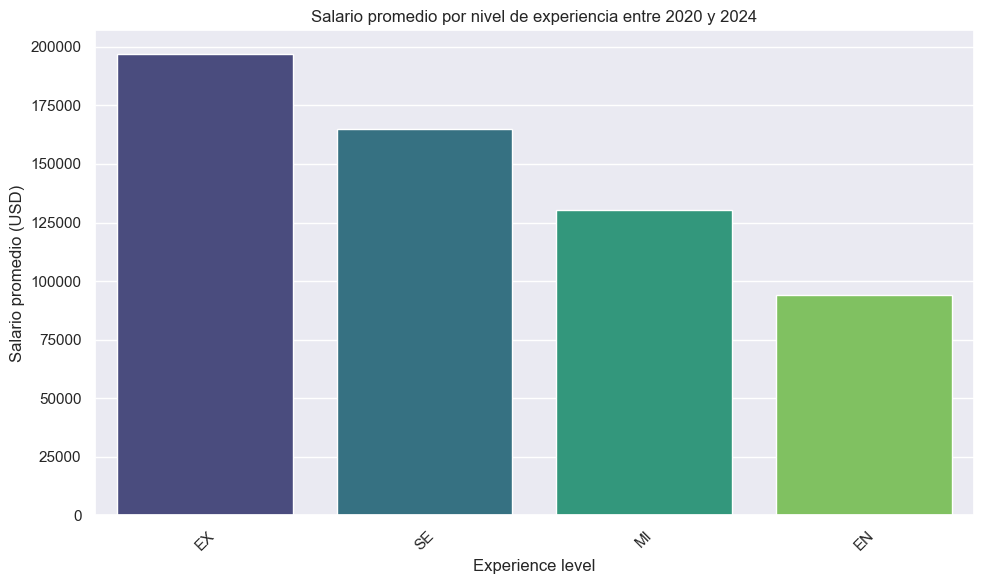

In [71]:
# Gráfico del salario promedio por país (muestra los 5 principales)
plot_mean_salary_trends(
    df,
    'company_location',
    'Salario promedio por país entre 2020 y 2024',
    limit=5
)

# Gráfico del salario promedio por tamaño de empresa
plot_mean_salary_trends(
    df,
    'company_size',
    'Salario promedio por tamaño de empresa entre 2020 y 2024'
)

# Gráfico del salario promedio por nivel de experiencia
plot_mean_salary_trends(
    df,
    'experience_level',
    'Salario promedio por nivel de experiencia entre 2020 y 2024'
)


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_by_year(df, x, y, title):
    yearly_salary = df.groupby(x)[y].mean().reset_index()
    
    plt.figure(figsize=(10,6))
    sns.lineplot(data=yearly_salary, x=x, y=y, marker='o')
    plt.title(title)
    plt.xlabel(x.replace('_', ' ').capitalize())
    plt.ylabel(f'Salario promedio ({y})')
    plt.xticks(yearly_salary[x].unique())
    plt.grid(True)
    plt.tight_layout()
    plt.show()


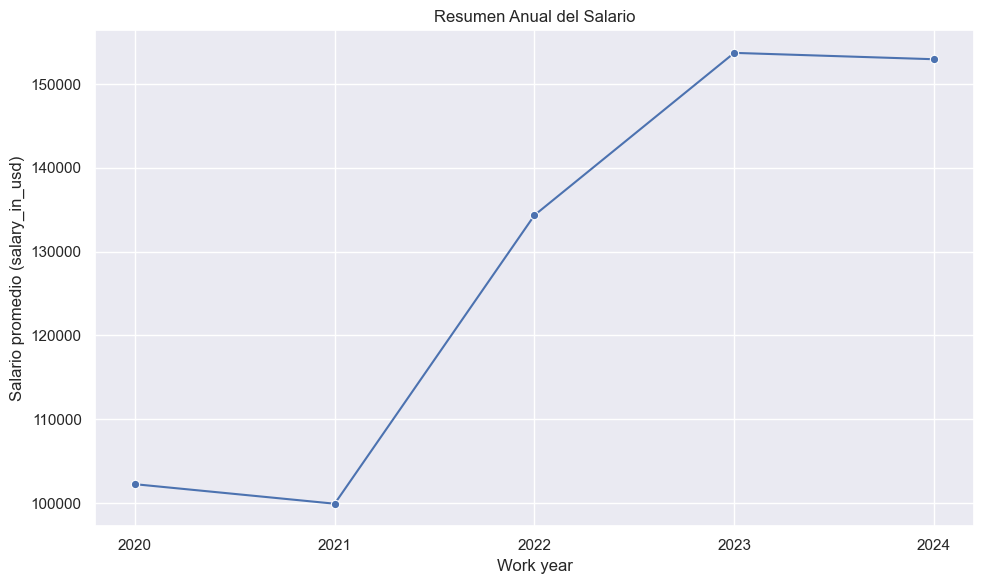

In [73]:
# Graficar la evolución anual del salario

plot_by_year(
    df,
    x='work_year',            # Eje X: año de trabajo
    y='salary_in_usd',        # Eje Y: salario en dólares
    title='Resumen Anual del Salario'  # Título del gráfico
)
